# Setup

In [ ]:
import os, PIL
import uaiDiffusers.uaiDiffusers as uaiDiffusers 
import uaiDiffusers.hair as hair 


: 

# Usage Examples

In [2]:
baseFaceImagePath = "jjinput\JustinJaro_00.png"
baseFaceImage = PIL.Image.open(baseFaceImagePath)


## Get Selfie Body

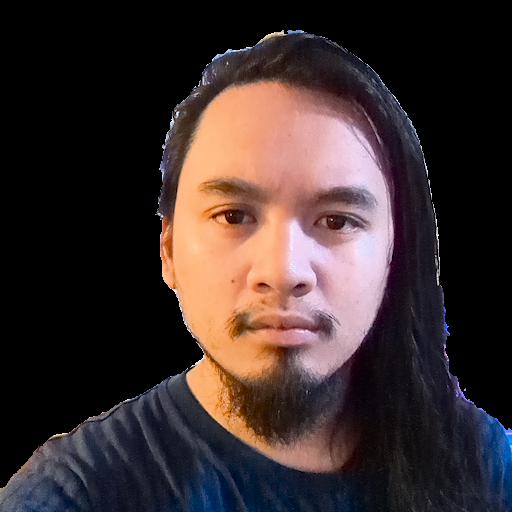

In [7]:

selfieMask, person = uaiDiffusers.GetSelfieBodyMask(baseFaceImage)
person

## Extract Face

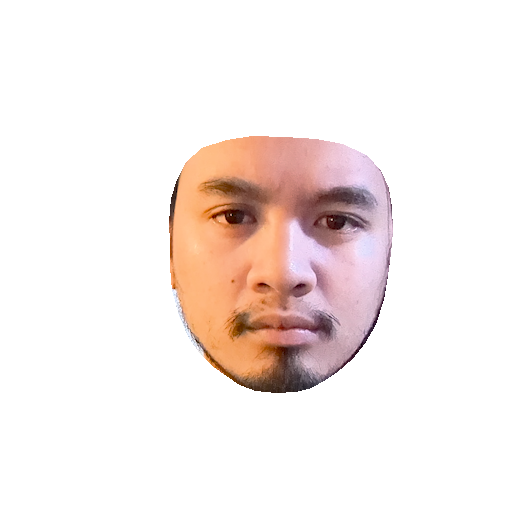

In [4]:
facemask, faceMasked = uaiDiffusers.ExtractFace(baseFaceImage)
faceMasked

## Get Selfie Face Canny Edges

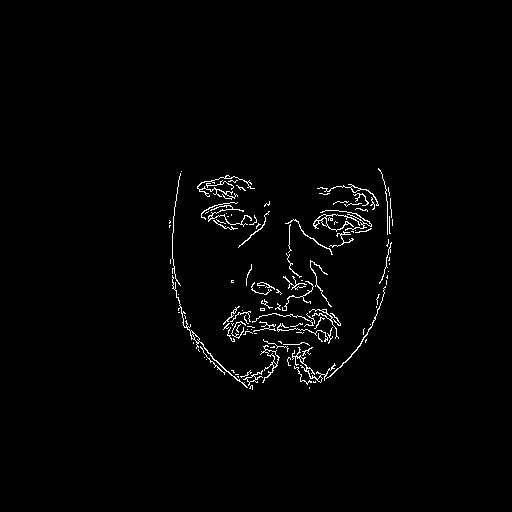

In [4]:

low_threshold = 100
high_threshold = 200
canny_image = uaiDiffusers.GetSelfieFaceCannyEdges(baseFaceImage, low_threshold, high_threshold)
canny_image

## Get Selfie Body Canny Edges

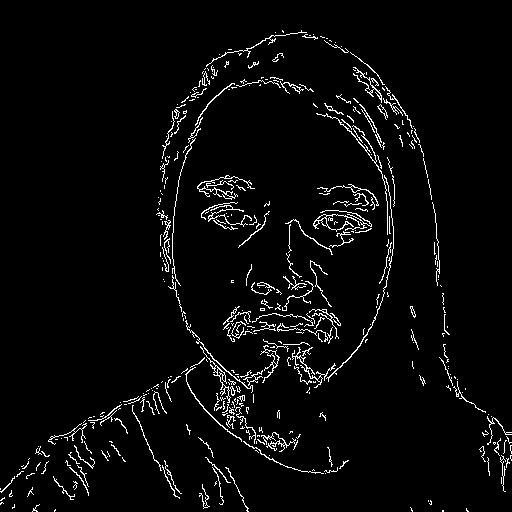

In [5]:

low_threshold = 100
high_threshold = 200
canny_image = uaiDiffusers.GetSelfieBodyCannyEdges(baseFaceImage,0.5,0, low_threshold, high_threshold)
canny_image

## Hair Segmentation

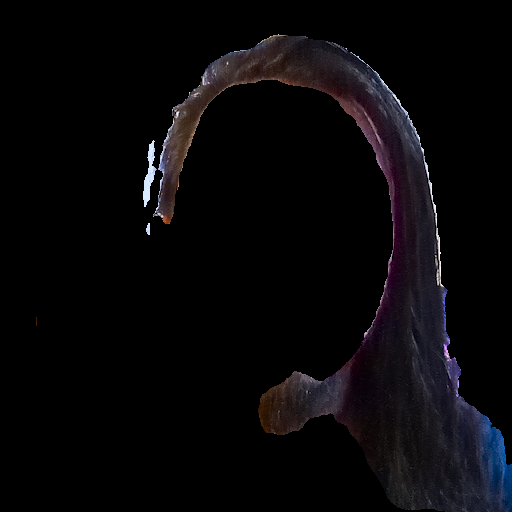

In [12]:
image, mask = uaiDiffusers.GetHairMask(baseFaceImage)
hairImg = uaiDiffusers.CV2ToPIL(image)
hairImg

## SD HF: Dreambooth Lora
Use Huggingface trained Dreambooth Lora models

In [ ]:
testName = "Justin Jaro, filipino man, 30 years old, 5'6, 170 lbs, 3 point lighting "
sdLora = uaiDiffusers.RunSDLora( sdRepo = "wavymulder/portraitplus", loraPath = "justinjaro_lora/pytorch_lora_weights.bin", imagesToGenerate = 3, prompt = "portrait+ style A photo of "+testName+" eating a Cheeseburger. high quality photo ", negative_prompt=" blurry, not filipino")

#Not needed for this example, just to view the images.
grid = uaiDiffusers.imageGrid(sdLora, 1, 3)
grid

## SD Face Change With Lora

In [ ]:
baseFaceImagePath = "jjinput\JustinJaro_00.png"
baseFaceImage = PIL.Image.open(baseFaceImagePath)
testName = "Justin Jaro"
imagesToGenerate = 12
outputPath = "output/" + testName.replace(" ", "_") + "/"
if not os.path.exists(outputPath):
    os.makedirs(outputPath)
for imgIndx in range(imagesToGenerate): 
    percentage = int( imgIndx/imagesToGenerate * 100)
    appliedFace, selfieMask,  facemask = uaiDiffusers.AugmentFaceSDControlnetLoraFace(baseFaceImage, sdRepo="wavymulder/portraitplus",cannyRepo="lllyasviel/sd-controlnet-canny", loraPath="justinjaro_lora\pytorch_lora_weights.bin", prompt_="portrait+ style A photo of "+testName+ str.format( ". Filipino. Oilyskin={percentage_}%. Acne={percentage_}%. AcneScaring={percentage_}%  . DarkEyebags={percentage_}%  ", percentage_=percentage), negPrompt_=" blurry, high contrast, hdr, painterly, painting, drawing, illustration", imagesToGenerate=1)
    outputFilepath = outputPath + testName.replace(" ", "_") + "_"+str(imgIndx).zfill(4)+".png"
    appliedFace.save(outputFilepath)

## Create Face Crop Dataset
Create a dataset of faces based on a search pattern, padding, and size

In [ ]:
uaiDiffusers.CreateFaceDataset(inputSearchPattern= "johnSmith\johnSmith*.jpg",outputImageDir= "johnSmith\johnSmithDataset", prefix="johnSmith",padding= 1000,size= (512,512))


# 

# Generate Face From Fine Tuned SD

In [ ]:

baseFaceImagePath = "mbai_7132.png"
baseFaceImage = PIL.Image.open(baseFaceImagePath)
testName = "mqingBa1"
maxCount = 10
generatedImages = []
for count in range(maxCount):
    appliedFace, selfieMask,  facemask = uaiDiffusers.AugmentFaceCustomSDControlnetFace(baseFaceImage, sdRepo="wavymulder/portraitplus",cannyRepo="lllyasviel/sd-controlnet-canny", textualInversion="muqingBai_CustomSD/mqingBa1.bin",customSDBin="muqingBai_CustomSD/pytorch_custom_diffusion_weights.bin", prompt_="portrait+ style A photo of a "+testName+f" person. Acne={int((count + 2 / maxCount ) * 100)}%, Oilyskin={int((count +0 / maxCount ) * 100)}%, eyebags={int((count + 5 / maxCount ) * 100)}%. Tired looking  ", negPrompt_=" blurry, high contrast, hdr. painterly. cgi. dead eyes. bad eyes", imagesToGenerate=1, seed=24, steps=50)
    generatedImages.append(appliedFace[0])
grid = uaiDiffusers.imageGrid(generatedImages, 1)
grid

In [ ]:
import uaiDiffusers
import glob
maxImages = 100
inputDirectory = "johnSmith\johnSmithDataset"
files = glob.glob(inputDirectory + "/*.png")
from random import shuffle
shuffle(files)
files = uaiDiffusers.uaiDiffusers.PruneFilesInFolder(files, maxImages)


# prune the image file list dataset and keep only maxImages count but remove randomly not sequentially
# write me a way to do this
 

: 